In [65]:
import numpy as np
import pandas as pd
from scipy.io import loadmat, savemat
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import json
import h5py

In [66]:
src = "../../../../../../media/mods-pred/Datasets/Data_uconn_h5/50/1.h5"

In [67]:
with h5py.File(src, "r") as f:
    keys = list(f.keys())
    print(keys)
    raw = f[keys[0]][:]  

# Convert to text
text = raw.tobytes().decode("utf-8")

# Load as json
data_json = json.loads(text)

df = pd.DataFrame(data_json)
print(df.keys())

['rpt_cell_50_part1']
Index(['', 'Week Number', 'RPT Number', 'Date (yyyy.mm.dd hh.mm.ss)',
       'Step Number', 'State', 'Time (s)', 'Voltage (V)', 'Current (A)',
       'Capacity (Ah)', 'Segment Key', 'Pulse Type', 'Pulse SOC', 'Life',
       'Num Cycles'],
      dtype='object')


In [68]:
dfWeek = df["Week Number"]
dfWeek

0          8.0
1          8.0
2          8.0
3          8.0
4          8.0
          ... 
999995    16.0
999996    16.0
999997    16.0
999998    16.0
999999    16.0
Name: Week Number, Length: 1000000, dtype: object

In [69]:
dfTime = df["Time (s)"]
dfTime = [float(i) for i in dfTime]
dfTime

[1994.3,
 1994.4,
 1994.5,
 1994.6,
 1994.7,
 1994.8,
 1994.9,
 1995.0,
 1995.1,
 1995.2,
 1995.3,
 1995.4,
 1995.5,
 1995.6,
 1995.7,
 1995.8,
 1995.9,
 1996.0,
 1996.1,
 1996.2,
 1996.3,
 1996.4,
 1996.5,
 1996.6,
 1996.7,
 1996.8,
 1996.9,
 1997.0,
 1997.1,
 1997.2,
 1997.3,
 1997.4,
 1997.5,
 1997.6,
 1997.7,
 1997.8,
 1997.9,
 1998.0,
 1998.1,
 1998.2,
 1998.3,
 1998.4,
 1998.5,
 1998.6,
 1998.7,
 1998.8,
 1998.9,
 1999.0,
 1999.1,
 1999.2,
 1999.3,
 1999.4,
 1999.5,
 1999.6,
 1999.7,
 1999.8,
 1999.9,
 2000.0,
 2000.1,
 2000.2,
 2000.3,
 2000.4,
 2000.5,
 2000.6,
 2000.7,
 2000.8,
 2000.9,
 2001.0,
 2001.1,
 2001.2,
 2001.3,
 2001.4,
 2001.5,
 2001.6,
 2001.7,
 2001.8,
 2001.9,
 2002.0,
 2002.1,
 2002.2,
 2002.3,
 2002.4,
 2002.5,
 2002.6,
 2002.7,
 2002.8,
 2002.9,
 2003.0,
 2003.1,
 2003.2,
 2003.3,
 2003.4,
 2003.5,
 2003.6,
 2003.7,
 2003.8,
 2003.9,
 2004.0,
 2004.1,
 2004.2,
 2004.3,
 2004.4,
 2004.5,
 2004.6,
 2004.7,
 2004.8,
 2004.9,
 2005.0,
 2005.1,
 2005.2,
 2005.3,
 

In [70]:
dfU = df["Voltage (V)"]
dfU = [float(i) for i in dfU]
dfU

[2.6751,
 2.6748,
 2.6745,
 2.6742,
 2.6739,
 2.6736,
 2.6729,
 2.6726,
 2.6723,
 2.672,
 2.6711,
 2.6708,
 2.6705,
 2.6702,
 2.6695,
 2.6692,
 2.6689,
 2.6683,
 2.668,
 2.6677,
 2.6674,
 2.6667,
 2.6667,
 2.6661,
 2.6658,
 2.6655,
 2.6652,
 2.6646,
 2.6643,
 2.6633,
 2.663,
 2.6627,
 2.6624,
 2.6621,
 2.6618,
 2.6612,
 2.6605,
 2.6602,
 2.6599,
 2.6596,
 2.659,
 2.6587,
 2.6584,
 2.6581,
 2.6574,
 2.6571,
 2.6568,
 2.6565,
 2.6559,
 2.6553,
 2.655,
 2.6546,
 2.654,
 2.6534,
 2.6534,
 2.6528,
 2.6525,
 2.6519,
 2.6515,
 2.6512,
 2.6506,
 2.6503,
 2.65,
 2.6494,
 2.6491,
 2.6488,
 2.6484,
 2.6475,
 2.6472,
 2.6466,
 2.6463,
 2.646,
 2.6457,
 2.645,
 2.6447,
 2.6441,
 2.6438,
 2.6435,
 2.6429,
 2.6426,
 2.6422,
 2.6416,
 2.6413,
 2.641,
 2.6404,
 2.6398,
 2.6391,
 2.6388,
 2.6385,
 2.6382,
 2.6376,
 2.6373,
 2.6367,
 2.6364,
 2.636,
 2.6354,
 2.6351,
 2.6345,
 2.6342,
 2.6336,
 2.6333,
 2.6329,
 2.632,
 2.6317,
 2.6314,
 2.6308,
 2.6305,
 2.6298,
 2.6295,
 2.6289,
 2.6286,
 2.6283,
 2.62

In [71]:
dfI = df["Current (A)"]
dfI = [float(i) for i in dfI]
dfI

[-1.20068994140625,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20068994140625,
 -1.20068994140625,
 -1.20068994140625,
 -1.20068994140625,
 -1.20068994140625,
 -1.20068994140625,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20068994140625,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20068994140625,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20068994140625,
 -1.20052001953125,
 -1.20052001953125,
 -1.20068994140625,
 -1.20052001953125,
 -1.20052001953125,
 -1.20068994140625,
 -1.20068994140625,
 -1.20052001953125,
 -1.20068994140625,
 -1.20052001953125,
 -1.20068994140625,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20052001953125,
 -1.20068994140625,
 -1.20052001953125,


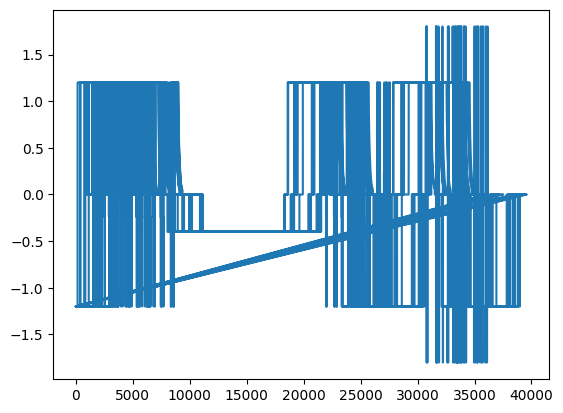

In [72]:
# plot current vs time
plt.plot(dfTime, dfI)
plt.show()

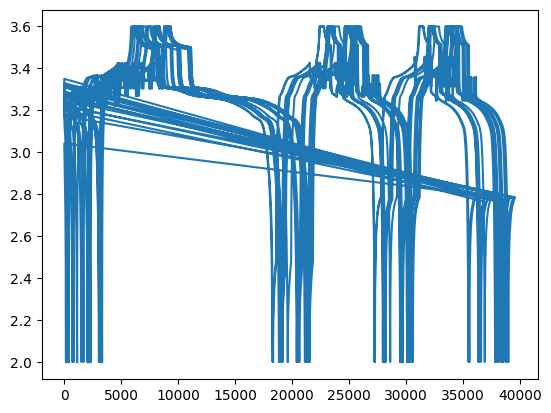

In [73]:
plt.plot(dfTime, dfU)
plt.show()

In [74]:
dfDate = df["Date (yyyy.mm.dd hh.mm.ss)"]
print(dfDate[0])
print(dfDate[999999])

2023-01-09 20:57:41
2023-03-17 00:22:49


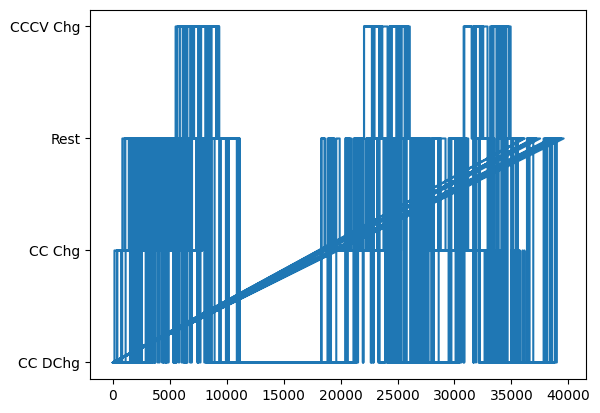

In [75]:
dfState = df["State"]

plt.plot(dfTime, dfState)
plt.show()